# Lineare Regression

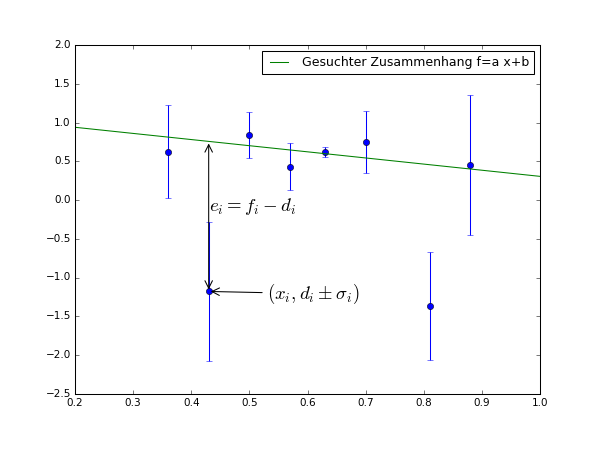

In [5]:
from IPython.display import Image 
Image(filename=('Linreg_Beispiel.png'))

## Problemstellung:

Für gegebene Daten $d_i\pm \sigma_i$ an den Stellen $x_i$ $(i=1 .. N)$ ist die lineare Funktion $f$ ("Ausgleichsgerade") 

$$f=a x +b$$ 

zu bestimmen, die die Daten "möglichst gut" repräsentiert. Dabei soll die Kenntnis über die Fehler berücksichtigt werden, d.h. "schlechtere" Daten weniger berücksichtigt werden.

Der Fehler $e_i$ für die einzelnen Datenpunkte $d_i$ ist gegeben durch die Abweichung zur Modellgeraden

$$e_i=f_i-d_i$$

Es liegt ein überbestimmtes Gleichungssystem vor mit den zwei unbekannten Parametern $a$ und $b$ und $N>2$ bekannten Variablen.

## Formalisierung des Problems (Least-Squares Methode):

Die Methode der *Summe der quadratischen Abweichungen* (*Least-Squares-Methode*) ist eine mathematische [Optimierung](https://de.wikipedia.org/wiki/Optimierung_%28Mathematik%29). Bei einer Optimierung geht es um das Finden von Minima oder Maxima von *Zielfunktionen*. Die Zielfunktion wird auch als *Fehlerfunktion* oder *Kostenfunktion* bezeichnet.

Die *Güte* eines Fits (die *Fehlerfunktion F*) ergibt sich aus der Summe der quadratischen Abweichungen zwischen den Daten und der zu optimierenden Funktion

$$
F(a,b)=\sum_{i=1}^{N} \frac{e_i^2}{\sigma_i^2}
$$

### Ziel 

Gesucht sind die speziellen Parameter $\hat{a},\hat{b}$ für die die Fehlerfunktion $F(\hat{a},\hat{b})$ minimal wird. Diese gesuchten Parameter führen zu einer *optimalen* Anpassung an die Daten. 

### Methode 

Im Minimum von $F$ muss gelten:
$$
\frac{\partial F}{\partial a}=0
$$

$$
\frac{\partial F}{\partial b}=0
$$

$$
F(a,b)=\sum_{i=1}^{N} \frac{e_i^2}{\sigma_i^2}=\sum_{i=1}^{N} \frac{(ax_i+b-d_i)^2 }{\sigma_i^2}\\
=\sum_{i=1}^{N} \frac{1}{\sigma_i^2} ( a^2 x_i^2 + 2 a b x_i - 2 a d_i x_i + b^2 - 2 b d_i + d_i^2 )
$$


### Bestimmungsgleichungen für Minimum der quadratischen Abweichung (optimaler Fit)
Aus den Ableitungen folgen die Gleichungen für die Bestimmung der optimalen Ausgleichsgeraden $f=\hat{a} x + \hat{b}$  

$$
\frac{\partial F}{\partial a}=0=\underbrace{(\sum_{i=1}^{N} \frac{x_i^2 }{\sigma_i^2})}_{\alpha} \hat{a} + \underbrace{(\sum_{i=1}^{N} \frac{x_i }{\sigma_i^2})}_{\beta} \hat{b} - \underbrace{(\sum_{i=1}^{N} \frac{x_i d_i }{\sigma_i^2})}_{\gamma}  
$$


$$
\frac{\partial F}{\partial b}=0=\underbrace{(\sum_{i=1}^{N} \frac{x_i }{\sigma_i^2})}_{\beta} \hat{a} + \underbrace{(\sum_{i=1}^{N} \frac{1 }{\sigma_i^2})}_{\epsilon} \hat{b} - \underbrace{(\sum_{i=1}^{N} \frac{d_i }{\sigma_i^2})}_{\delta}
$$

Vereinfachen wir mit  $\alpha=\sum \frac{x_i^2 }{\sigma_i^2}$, $\beta=\sum \frac{x_i }{\sigma_i^2}$, $\gamma=\sum \frac{x_i d_i }{\sigma_i^2}$, $\delta=\sum \frac{d_i }{\sigma_i^2}$ und $\epsilon=\sum \frac{1 }{\sigma_i^2}$, so folgt


$$
\alpha \hat{a}  + \beta \hat{b} = \gamma
$$


$$
\beta \hat{a}  + \epsilon \hat{b} = \delta
$$

Durch Umformen und Einsetzen erhalten wir die Berechnungsformeln für $\hat{a}$ und $\hat{b}$


$$
\hat{b} = \frac{ \alpha \delta - \beta \gamma }{ \alpha \epsilon - \beta^2 }
$$

$$
\hat{a} = \frac{  \gamma - \beta \hat{b} }{ \alpha } 
$$



# Aufgabe lineare Regression

Gegeben sind die folgenden Datenpunkte $d_i\pm \sigma_i$ an den Stellen $x_i$ $(i=1 .. 8)$

Programmieren Sie eine Funktion *ausgleichsgerade(x,d,sigma)*, welche die Regressionsparameter $\hat{a}$ und $\hat{b}$  berechnet.

In [2]:
%pylab inline
from ausgleichsgerade import ausgleichsgerade

# Zufällige Beispieldaten
x=array([ 0.63,  0.81,  0.36,  0.43,  0.70, 0.57 ,  0.50,  0.88])
d=array([ 0.62, -1.37,  0.62, -1.18,  0.75, 0.43 ,  0.84,  0.45])
sigma=array([0.06,  0.7,  0.6,  0.9,  0.4, 0.3,  0.3 ,  0.9])

# Diese Funktion gilt es zu programmieren
a,b=ausgleichsgerade(x,d,sigma)

# Erzeuge neue X und Y Werte zum Plotten der Ausgleichsgerade
X=linspace(0.2,1)
Y=a*X+b

# Graphische Ausgabe, siehe oben
figure(figsize=(8,6))
errorbar(x,d,yerr=sigma,fmt='o')
plot(X,a*X+b,'g-',label='Gesuchter Zusammenhang f=a x+b')
i=3
annotate('$(x_i,d_i\pm \sigma_i)$',xy=(x[i], d[i]), \
         arrowprops=dict(arrowstyle='->'), xytext=(x[i]+0.1, d[i]-0.1),fontsize=18)
annotate('',xy=(x[i], d[i]), arrowprops=dict(arrowstyle='<->'), \
         xytext=(x[i], x[i]*a+b),fontsize=18)
text(x[i], x[i]*a+b-sigma[i],'$e_i=f_i-d_i$',fontsize=18)
axis([0.2,1.0,-2.5,2.0])
legend()
savefig('Linreg_Beispiel.png',dpi=75) # Speichern als Bild
close()

Populating the interactive namespace from numpy and matplotlib


## Lösungshilfe Python

Ergänzen Sie die fehlenden Berechnungsvorschriften ...

In [12]:
%%file ausgleichsgerade.py
from numpy import sum

def ausgleichsgerade(x,d,s):
    """Berechne die Ausgleichsgerade f = a * x + b fuer Datenpunkte, die durch die Vektoren 
        x_i, d_i +- s_i gegeben sind.

        Eingabe: 
            x X-Achsenabschnitt
            d Y-Achsenabschnitt
            s Fehler
        Ausgabe:
            a_fit, b_fit
    """
    alpha=sum(x**2/s**2)
    ...
    ...
    b_fit=...
    a_fit=...
    return a_fit, b_fit

## Lösungshilfe Matlab/Octave

In [3]:
x=[ 0.63,  0.81,  0.36,  0.43,  0.70, 0.57 ,  0.50,  0.88];
d=[ 0.62, -1.37,  0.62, -1.18,  0.75, 0.43 ,  0.84,  0.45];
sigma=[0.06,  0.7,  0.6,  0.9,  0.4, 0.3,  0.3 ,  0.9];

In [16]:
%%file ausgleichsgerade.m

function [a_fit, b_fit]=ausgleichsgerade(x,d,s)
    alpha=sum(x.^2./s.^2);
    ...
end


Created file '/home/lars/sync/Zeitserien/Zeitreihenanalyse/stunde3/ausgleichsgerade.m'.


In [21]:
[a,b]=ausgleichsgerade(x,d,sigma)

a = -0.79157
b =  1.0966


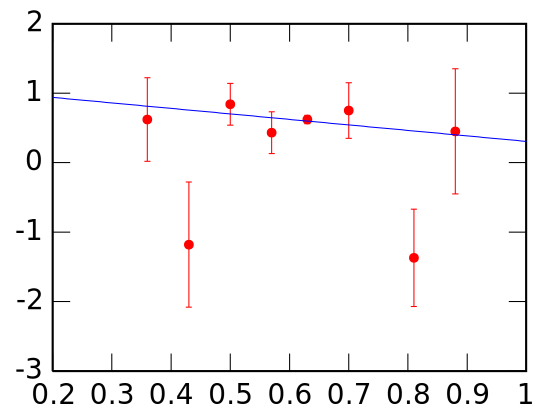

In [28]:
X=linspace(0.2,1);
Y=a*X+b;

errorbar(x,d,sigma,".r")
hold()
plot(X,a*X+b)

# Beispiel Jahresgang und Anomalien

In diesem Beispiel verwenden wir meteorologische Daten, um einen mittleren Jahresgang und Anomalien zu berechnen. Die verwendeten Daten vom DWD sind hier verfügbar:
http://icdc.zmaw.de/daten/atmosphere/dwd-station.html

Datenzitat: Freie Klimadaten von Messtationen für Deutschland, Deutscher Wetterdienst

## Pandas
Im Folgenden wird das Pandas-Modul zum Einlesen und Prozessieren der Daten genutzt. Einführungen dazu gibt es z.B. hier: 

 * http://dx.doi.org/10.1007/978-1-4842-0958-5 Python Data Analytics

 * http://proquest.safaribooksonline.com/9781449323592 Python for data analysis
 

Importieren des Moduls

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Einlesen der Daten

In [3]:
fn='dwdstation_hamburg_fuhlsbuettel_kl_10147.csv'
DF=pd.read_csv(fn,encoding = "ISO-8859-1",usecols=[6,7,8,15],parse_dates=[[0,1,2]])
DF.columns=['Date','T'] # Wir nutzen nur diese beiden Spalten 
DF.head() # Zeigt den "Kopf" der Tabelle

,Date,T
0,1891-01-01,-10.7
1,1891-01-02,-7.6
2,1891-01-03,-10.3
3,1891-01-04,-1.3
4,1891-01-05,-4.1


## Pandas Zeitserien Objekt

In [3]:
dates=pd.to_datetime(DF['Date'].values) # Create a separate DatetimeIndex for selections
T=pd.Series(DF['T'].values,index=dates) # Create a time series with date index

## Display  and indexing of time series

In [9]:
T['2015-12-24':] # Show all entries since 24th december

2015-12-24     8.5
2015-12-25     7.8
2015-12-26    13.0
2015-12-27    10.2
2015-12-28     3.7
2015-12-29     5.4
2015-12-30     4.5
2015-12-31     2.1
2016-01-01     3.5
2016-01-02     0.1
2016-01-03    -6.0
2016-01-04    -7.2
2016-01-05    -5.7
2016-01-06    -5.4
2016-01-07    -4.6
2016-01-08     2.3
2016-01-09     1.3
2016-01-10     1.9
2016-01-11     2.0
2016-01-12     4.3
dtype: float64

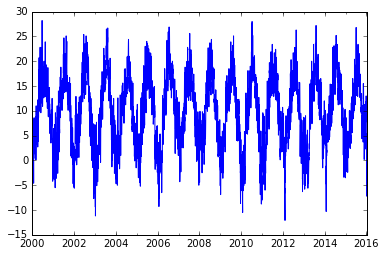

In [53]:
T['2000-01-01':'2016-01-12'].plot()

## Berechnung von wöchentlichen Mittelwerten

Pandas bietet vielfältige Methoden zur Auswahl von sich wiederholenden Perioden. In der folgenden Tabelle sind einige Codes zu finden.

|Code | Offset | Description   |
|-----|--------|---------------|
|D    | Day    | Calendar daily|
|H    |Hour    |Hourly |
|T or min| Minute | Minutely |
|S |Second |Secondly |
|L or ms| Milli |Millisecond |
|U |Micro | Microsecond |
|M |MonthEnd |Last calendar day of month|
|MS |MonthBegin | First calendar day of month|
|W-MON, W-TUE, ...| Week | Weekly on given day of week|
|A-JAN, A-FEB, ...|YearEnd| Annual dates anchored on last calendar day of given month|
|AS-JAN, AS-FEB, ...| YearBegin |Annual dates anchored on first day of given month|


In [13]:
week_index=dates.to_period(freq='W-THU') # Index für Wochenmittel, zentriert auf Donnerstag
W=52
weekly_mean=zeros(W)
for i in range(1,W+1):
    weekly_mean[i-1]=T[week_index.weekofyear==i].mean()

array([  1.04303653,   0.80715909,   0.73588571,   0.58114286,
         0.70971429,   0.88525714,   0.79131429,   1.0256    ,
         1.94377143,   2.65931429,   3.41062857,   4.1288    ,
         5.08548571,   6.10777143,   6.71497143,   7.82091429,
         9.10502857,   9.90457143,  11.09748571,  12.3752    ,
        13.07634286,  13.96822857,  15.1416    ,  15.09257143,
        15.65805714,  15.87885714,  16.91154286,  17.46011429,
        17.25485714,  17.56125714,  17.72937143,  17.4104    ,
        17.15554286,  16.80125714,  15.96662857,  15.36765714,
        14.51165714,  13.54308571,  12.64148571,  11.80365714,
        10.86845714,   9.35348571,   8.44102857,   7.43131429,
         6.52331429,   5.18114286,   4.06605714,   3.87554286,
         3.09588571,   2.32502857,   1.78731429,   1.58994286])

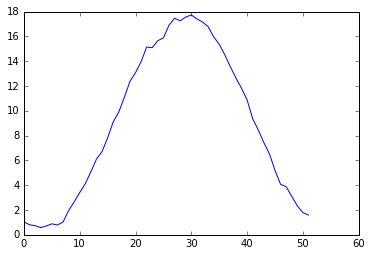

In [15]:
plot(weekly_mean)
weekly_mean.tofile('T_Jahresgang_Hamburg.csv',sep=',')
weekly_mean

In [11]:
DF.head()

,Date,T,Wochen,Wochenmittelwert
0,1891-01-01,-10.7,1,NaN
1,1891-01-02,-7.6,2,1.043037
2,1891-01-03,-10.3,2,0.807159
3,1891-01-04,-1.3,2,0.735886
4,1891-01-05,-4.1,2,0.581143


## Jahresgang-Analyse

Im Folgenden versuchen wir eine analytische Funktion (Sinus) an den Jahresgang anzupassen. Dazu verwenden wir eine Optimierungsmethode.

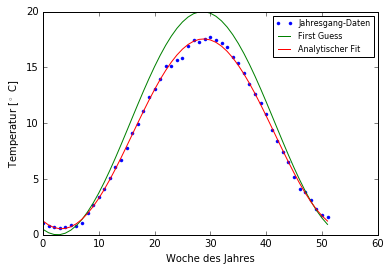

In [27]:
from scipy.optimize import curve_fit

# Analytische Representation des Jahresgangs
def my_seasonal(x, freq, amplitude, phase, offset):
    return sin(x * freq + phase) * amplitude + offset

p0=[2*pi/52,10,-0.6*pi,10] # First guess parameter
first_guess=my_seasonal(x,*p0) # first guess
x=arange(52)

fit = curve_fit(my_seasonal, x, weekly_mean, p0=p0)
seasonal_fit = my_seasonal(x, *fit[0])

plot(weekly_mean, '.',label='Jahresgang-Daten')
plot(first_guess, label='First Guess')
plot(seasonal_fit, label='Analytischer Fit')
legend(fontsize=8)
xlabel('Woche des Jahres')
ylabel('Temperatur [$^\circ$ C]')

## Berechnung der Anomalien

Die Anomalie ist die Abweichung zum klimatologischen Mittelwert (Jahresgang). Zur weiteren Bearbeitung/Analyse  speichern wir die Daten in einer CSV-Datei.

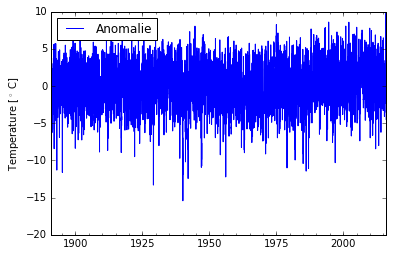

In [35]:
# Analytische Funktion der Klimatologie
T_climfit=my_seasonal(T.index.weekofyear,*fit[0])
T_climfit_dates=T.index
T_climfit_series=pd.Series(T_climfit,index=T_climfit_dates)

# Berechnung der Anomalien
T_weekly_resampled=T.resample('W-THU',how='mean')
T_anom=(T_weekly_resampled-T_climfit_series).dropna()
T_anom.plot(label='Anomalie')              
legend(loc=2)
ylabel('Temperature [$^\circ$ C]')

In [46]:
TABELLE=pd.DataFrame()
TABELLE['Wochenmittel']=T_weekly_resampled
TABELLE['Jahresgang']=T_climfit_series
TABELLE['Anomalie']=T_anom
TABELLE.to_csv('DWD_Hamburg_Wochenmittel_Jahresgang_Anomalien.csv')

In [1]:
!head DWD_Hamburg_Wochenmittel_Jahresgang_Anomalien.csv

,Wochenmittel,Jahresgang,Anomalie
1891-01-01,-10.7,0.881145149061247,-11.581145149061246
1891-01-08,-6.485714285714285,0.6484336986350101,-7.134147984349295
1891-01-15,-4.957142857142857,0.5431151330989668,-5.500257990241824
1891-01-22,-6.042857142857143,0.5667872246401657,-6.609644367497308
1891-01-29,1.7857142857142858,0.7190908475025619,1.066623438211724
1891-02-05,2.257142857142857,0.9977154262300836,1.2594274309127735
1891-02-12,-0.3857142857142858,1.3984339890608757,-1.7841482747751614
1891-02-19,0.5857142857142856,1.9151672946829565,-1.329453008968671
1891-02-26,0.5,2.540076059493823,-2.040076059493823


# Signifkanz von Trends

Sind die Trends signifikant? 

## Beispiel Meereis Ausdehnung


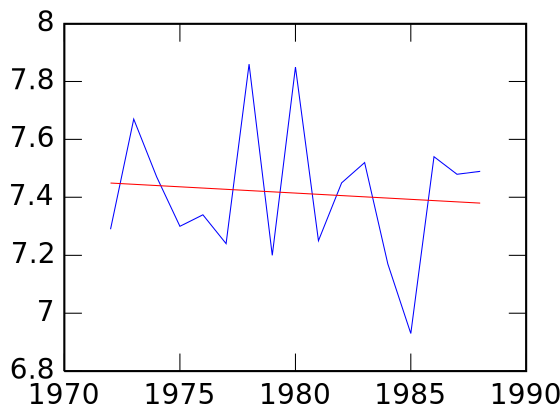

In [78]:
N=17; %nehme nur die ersten 17 Jahre des Datensatzes
Y=transpose(textread("september_extent_1972_2015.txt"));
X=1972:1:2015;
Y=Y(1:N);
X=X(1:N);

plot(X,Y);
hold;
p = polyfit(X,Y,1);
y_line=p(1)*X+p(2);
plot(X,y_line,"r")

## Beispiel Lufttemperatur in Hamburg

In [59]:
!head DWD_Hamburg_Wochenmittel_Jahresgang_Anomalien.csv

,Wochenmittel,Jahresgang,Anomalie
1891-01-01,-10.7,0.881145149061247,-11.581145149061246
1891-01-08,-6.485714285714285,0.6484336986350101,-7.134147984349295
1891-01-15,-4.957142857142857,0.5431151330989668,-5.500257990241824
1891-01-22,-6.042857142857143,0.5667872246401657,-6.609644367497308
1891-01-29,1.7857142857142858,0.7190908475025619,1.066623438211724
1891-02-05,2.257142857142857,0.9977154262300836,1.2594274309127735
1891-02-12,-0.3857142857142858,1.3984339890608757,-1.7841482747751614
1891-02-19,0.5857142857142856,1.9151672946829565,-1.329453008968671
1891-02-26,0.5,2.540076059493823,-2.040076059493823



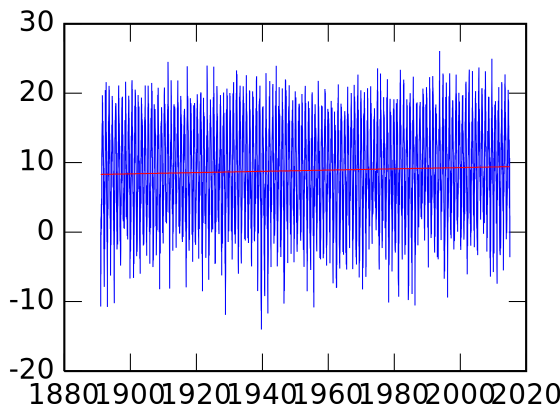

In [75]:
TAB=csvread("DWD_Hamburg_Wochenmittel_Jahresgang_Anomalien.csv");
T=transpose(TAB(:,2));
t=linspace(1891,2015,6526);
plot(t,T);
hold;
p = polyfit(t,T,1);
y_line=polyval(p,t);
plot(t,y_line,"r")

## Anomalie der Lufttemperatur

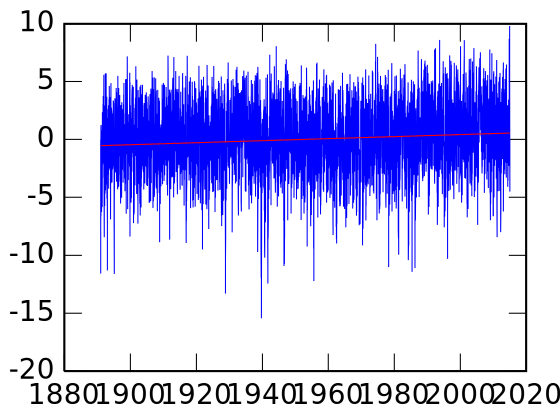

In [76]:
A=transpose(TAB(:,4));
plot(t,A);
hold;
p = polyfit(t,A,1);
y_line=polyval(p,t);
plot(t,y_line,"r")